# **Exploratory Data Analysis - Diabetes**
## Author: *Rizwan Rizwan*

In [2]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings


import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix

In [3]:
# load the dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## About the dataset

**Context**\
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.\
The objective is to predict based on diagnostic measurements whether a patient has diabetes.

**Content**\
Several constraints were placed on the selection of these instances from a larger database.\
In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Dataset Attributes**

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: '1' denotes patient having diabetes and '0' denotes patient not having diabetes.

**Solve the Following Task**
1. **Observe the dataset and**
2. **Perform EDA on the Dataset Which should include**\
a. **Visualization** and explore the data using seaborn\
&emsp;&emsp; i. Add your findings about the data under each graph in the code notebook\
b. **Identify the data patterns** if exist for single/multiple variables

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


dataset has 768 instances (rows) and 9 features (columns)

In [5]:
# data types
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

data has 7 int64 and 2 float64 type variables

In [6]:
# finding healthy (non diabetic =0) and unhealthy (diabetic=1) in data
print(df.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


500 is rated as 0  (no diabetes) and 268 as 1 (with diabetes):

<Axes: xlabel='Outcome', ylabel='count'>

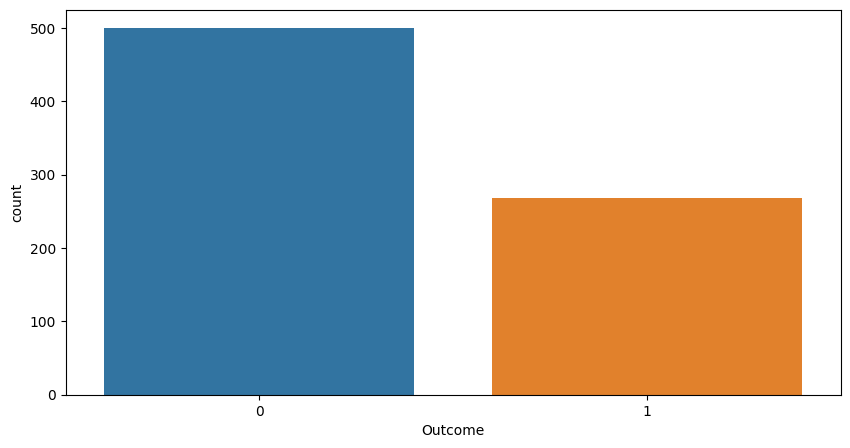

In [7]:
# lets draw this with countplot
sns.countplot(data=df, x='Outcome', label="Count")

In [8]:
# create datarame in Outcome =0 and Outcome=1
df_0=df[df['Outcome']==0]
df_1=df[df['Outcome']==1]

In [10]:
# average Age of healthy person
df_0['Age'].mean()

31.19

In [11]:
# average Age of diabetic person
df_1['Age'].mean()

37.06716417910448

it means diabetes occuring chances are high with age above than 37 years

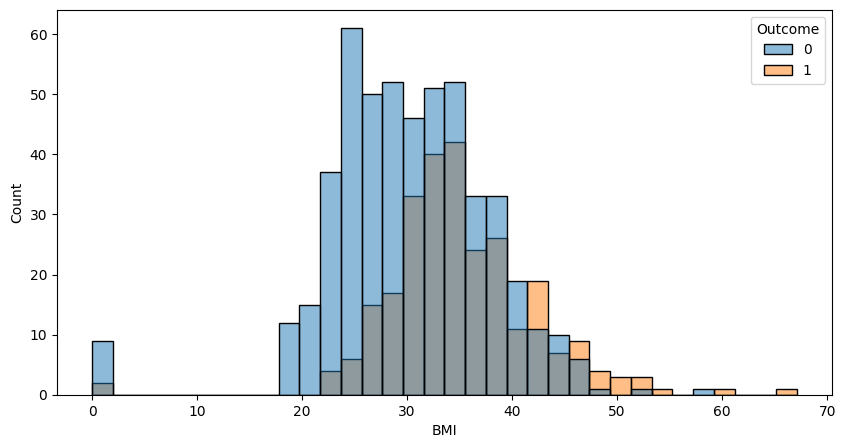

In [12]:
# histogram of BMI

sns.histplot(data=df, x='BMI'  , hue='Outcome')
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

In [13]:
# average healthy people BMI
df_0['BMI'].mean()

30.3042

In [14]:
# maximum healthy people BMI
df_0['BMI'].max()

57.3

In [15]:
# unhealthy people average BMI
df_1['BMI'].mean()

35.14253731343284

In [16]:
# unhealthy people maximum BMI
df_1['BMI'].max()

67.1

it concludes if a person has BMI greater than 58, he/she is likely to have diabetes!

<Axes: xlabel='Pregnancies', ylabel='count'>

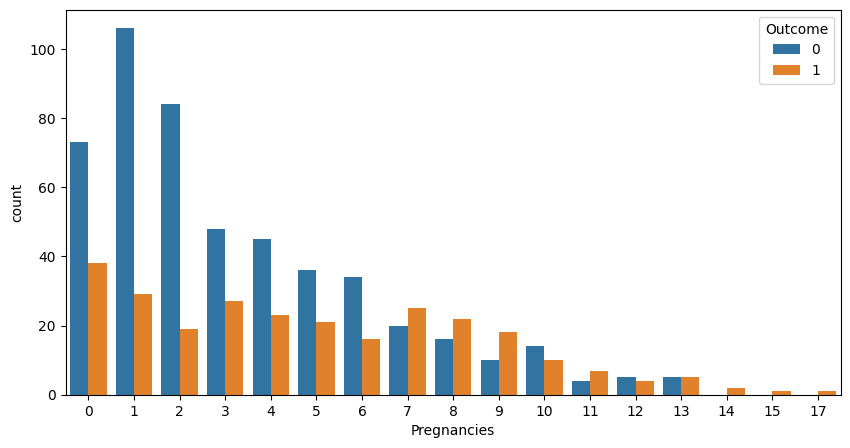

In [17]:
sns.countplot(data= df, x='Pregnancies',hue="Outcome")

In [18]:
# average healthy people pregnancies
df_0['Pregnancies'].mean()

3.298

In [19]:
# maximum healthy people pregnancies
df_0['Pregnancies'].max()

13

In [20]:
# average unhealthy people pregnancies
df_1['Pregnancies'].mean()

4.865671641791045

In [21]:
# maximum unhealthy people pregnancies
df_1['Pregnancies'].max()

17

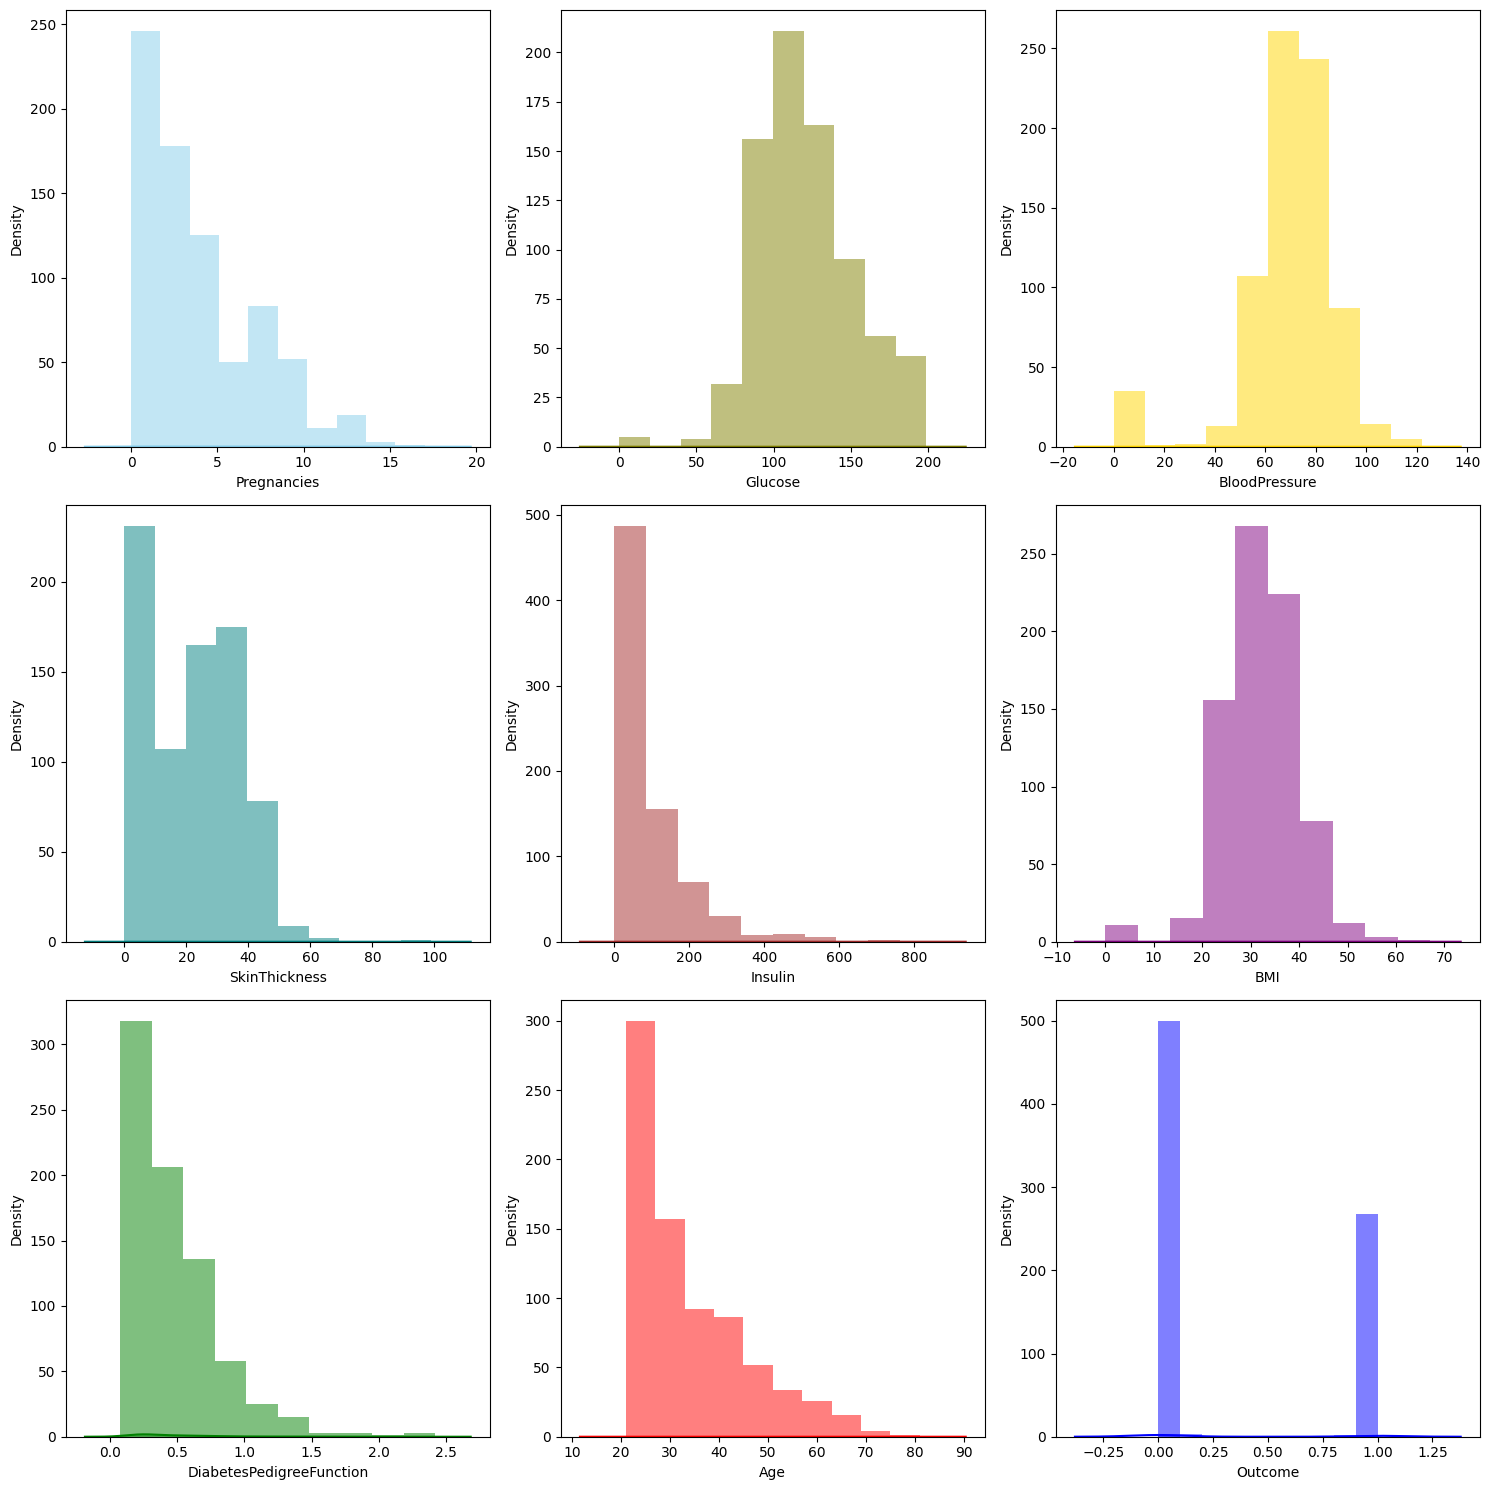

In [29]:
# draw a distplot of each feature
import matplotlib.pyplot as plt
import seaborn as sns
lst1=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
lst_col=['skyblue','olive','gold','teal','brown','purple','green','red','blue']
f, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=False) # Set up the matplotlib figure
axes = axes.flatten()  # Plot a simple histogram with binsize determined automatically
for ax,k,m in zip(axes,lst1,lst_col):
    ax.hist(df[k], color=m, bins=10, alpha=0.5)
    sns.distplot(df[k], color=m, ax=ax)
plt.tight_layout()

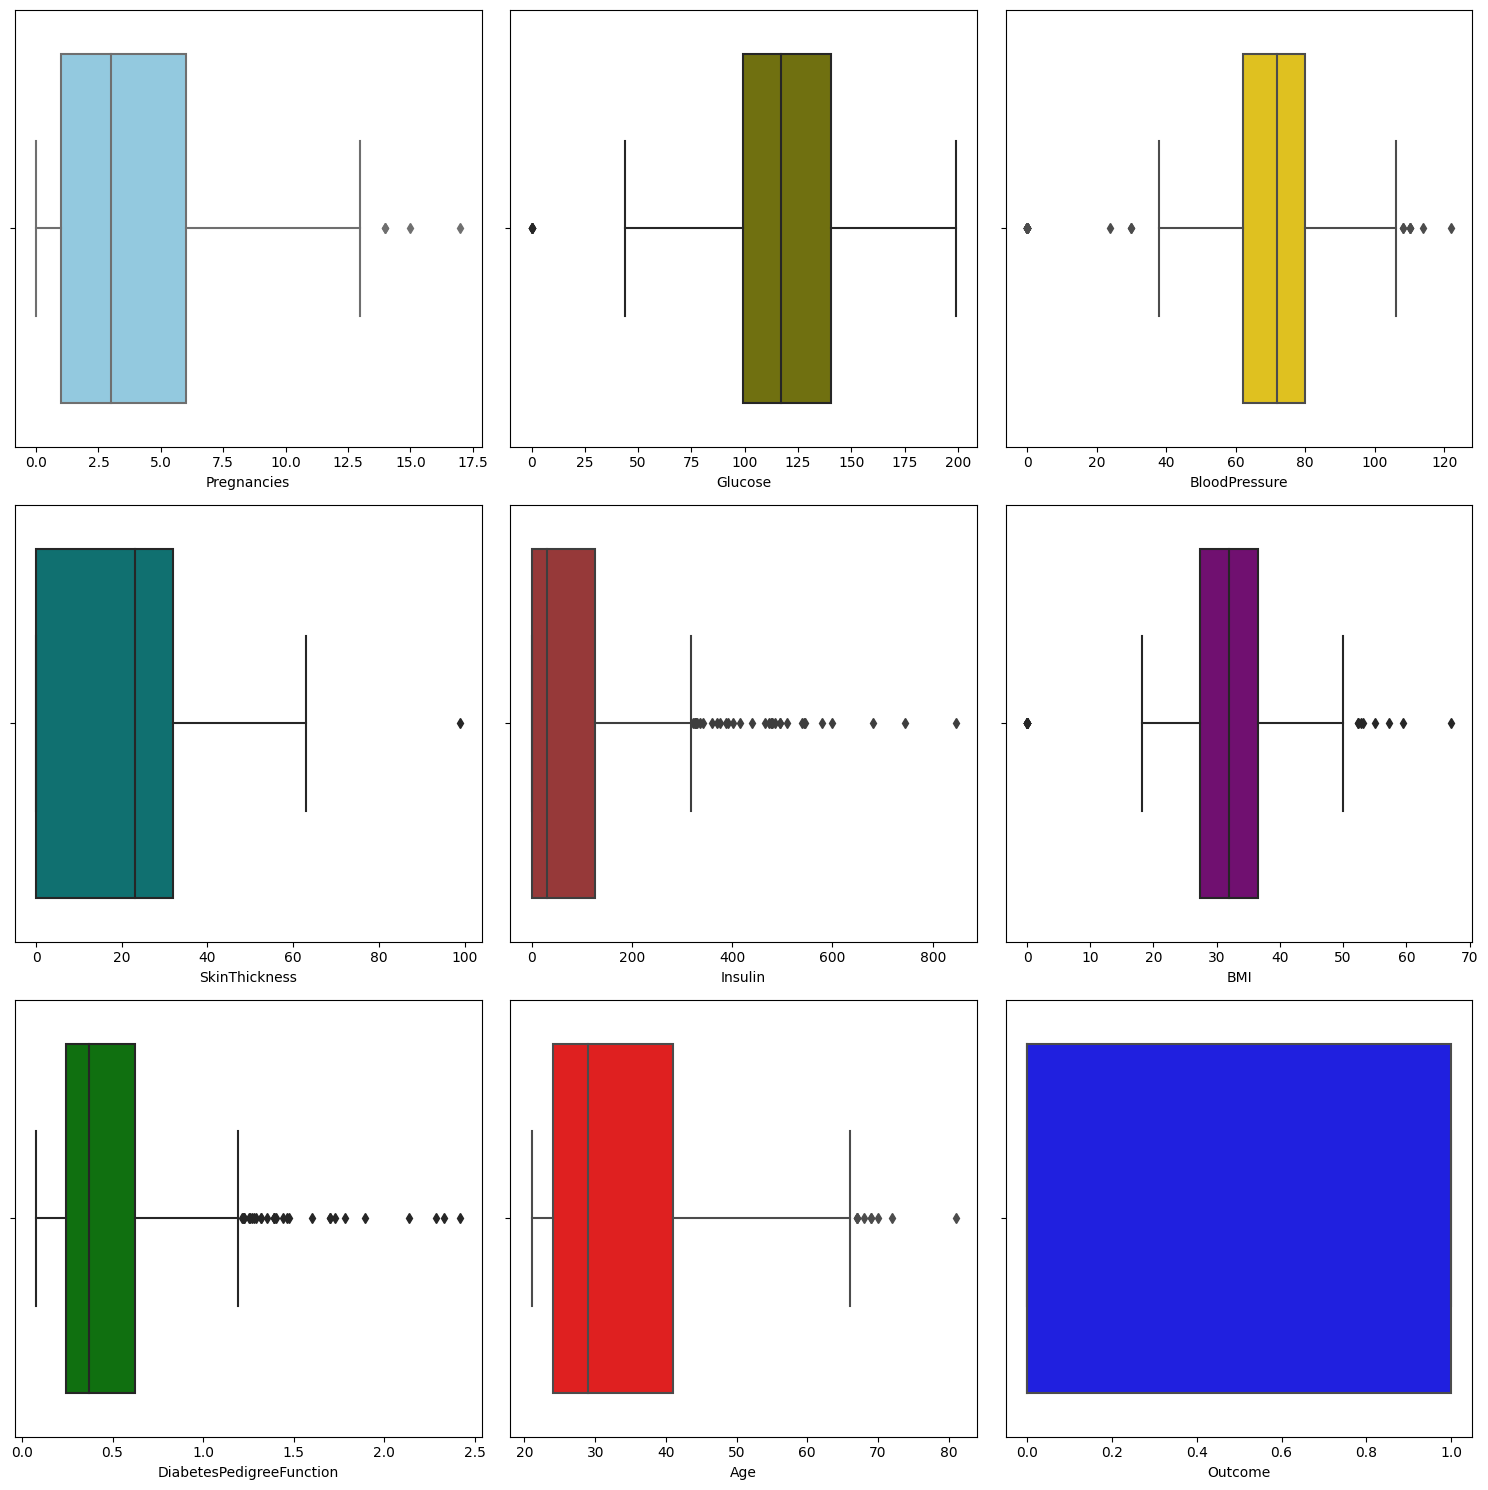

In [30]:
# Generate a box plot for each feature
lst1=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
lst_col=['skyblue','olive','gold','teal','brown','purple','green','red','blue']
f, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=False) # Set up the matplotlib figure
axes = axes.flatten()  # Plot a simple histogram with binsize determined automatically
for ax,k,m in zip(axes,lst1,lst_col):
    sns.boxplot(data=df, x=k, color=m, ax=ax)
plt.tight_layout()
plt.show()

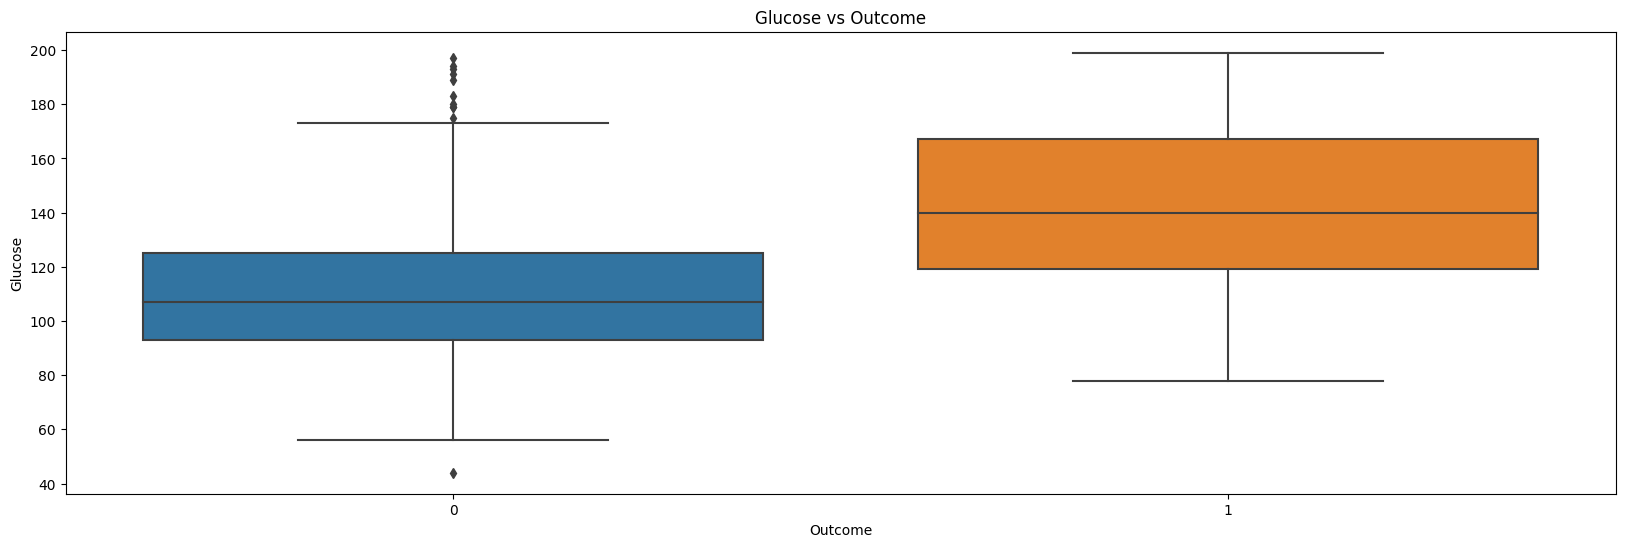

In [37]:
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Glucose vs Outcome')
plt.show()

unhealthy people have higher level of glucose in their blood.

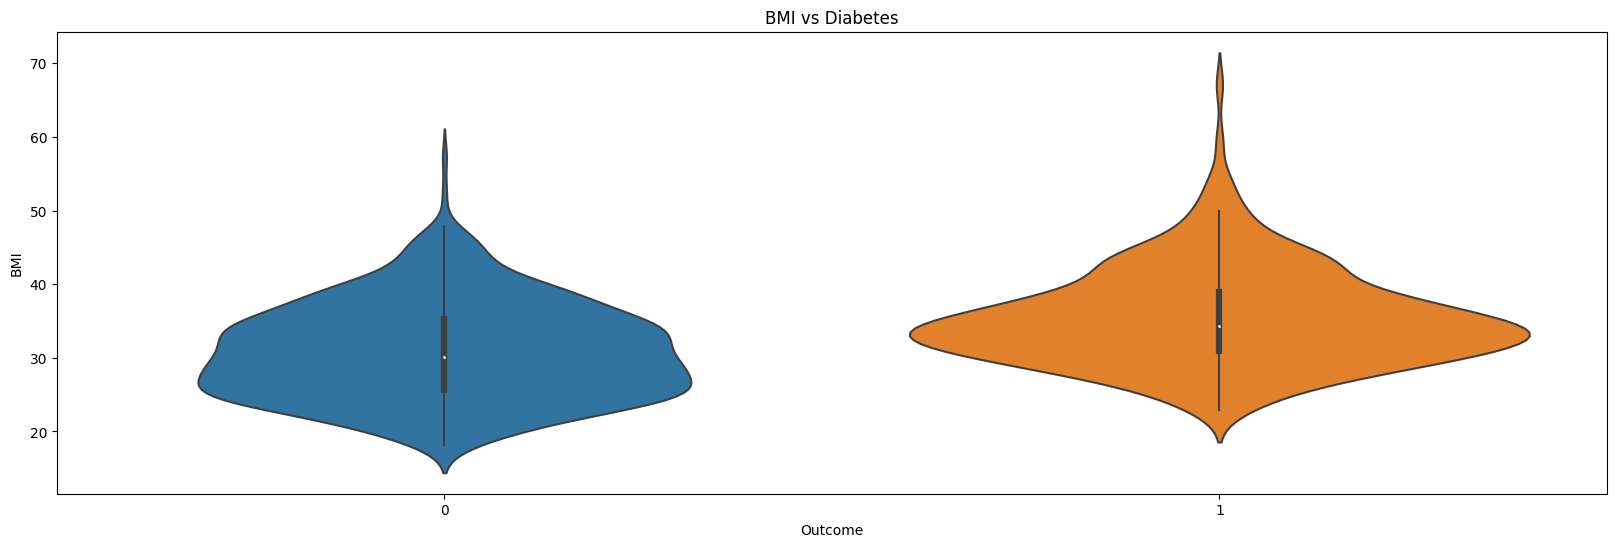

In [38]:
sns.violinplot(x='Outcome', y='BMI', split=True, data=df)
plt.title('BMI vs Diabetes')
plt.show()

higher the BMI is, it is more likely to get diabetes.

<Axes: xlabel='Pregnancies', ylabel='Count'>

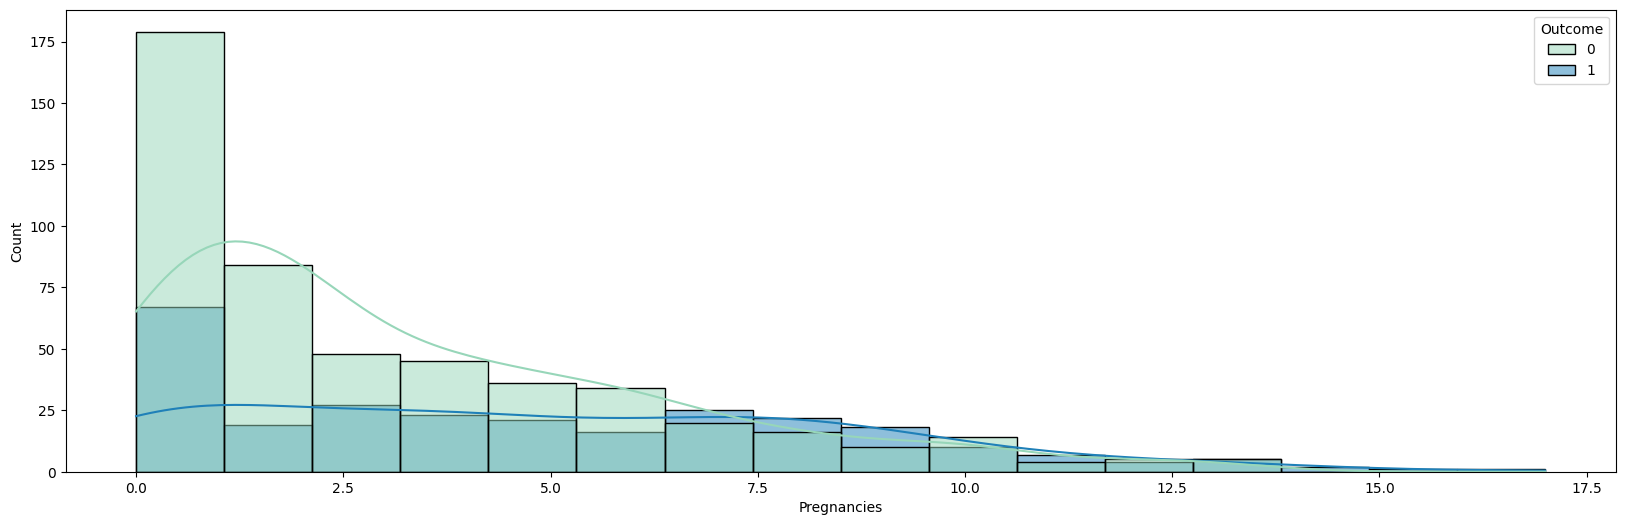

In [39]:
sns.histplot(data=df, x="Pregnancies", hue="Outcome",kde=True,palette="YlGnBu")

<Axes: xlabel='Glucose', ylabel='Count'>

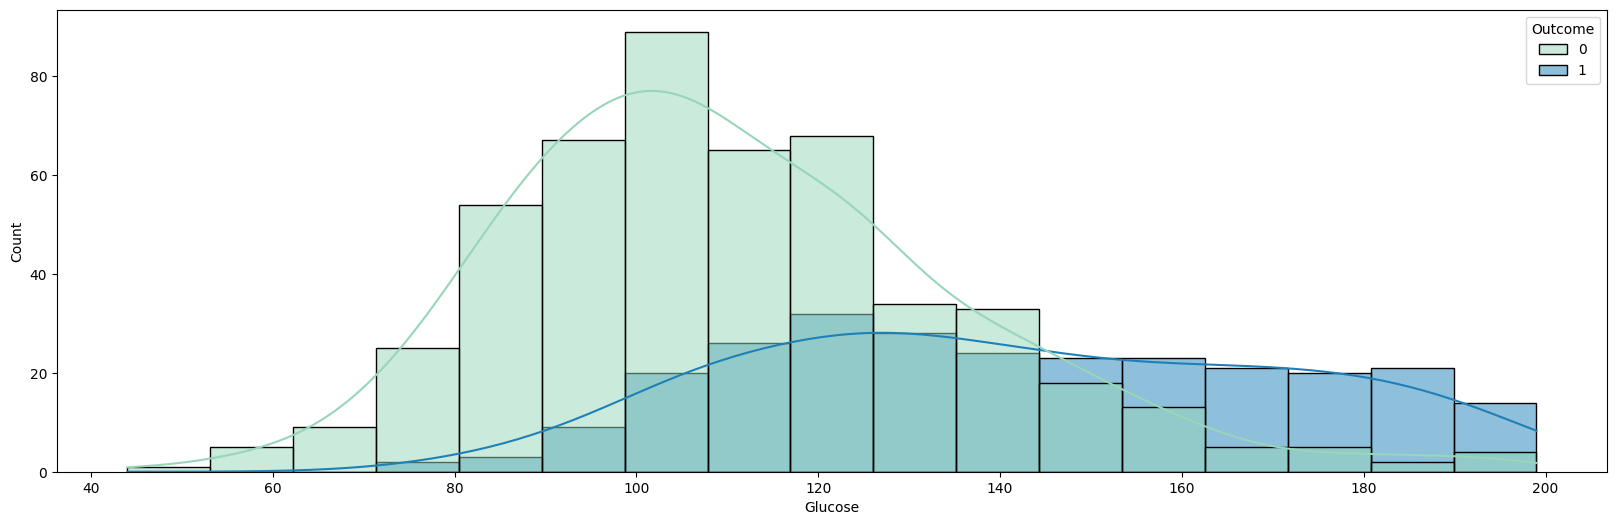

In [46]:
sns.histplot(data=df, x="Glucose", hue="Outcome",kde=True,palette="YlGnBu")

(20.0, 80.0)

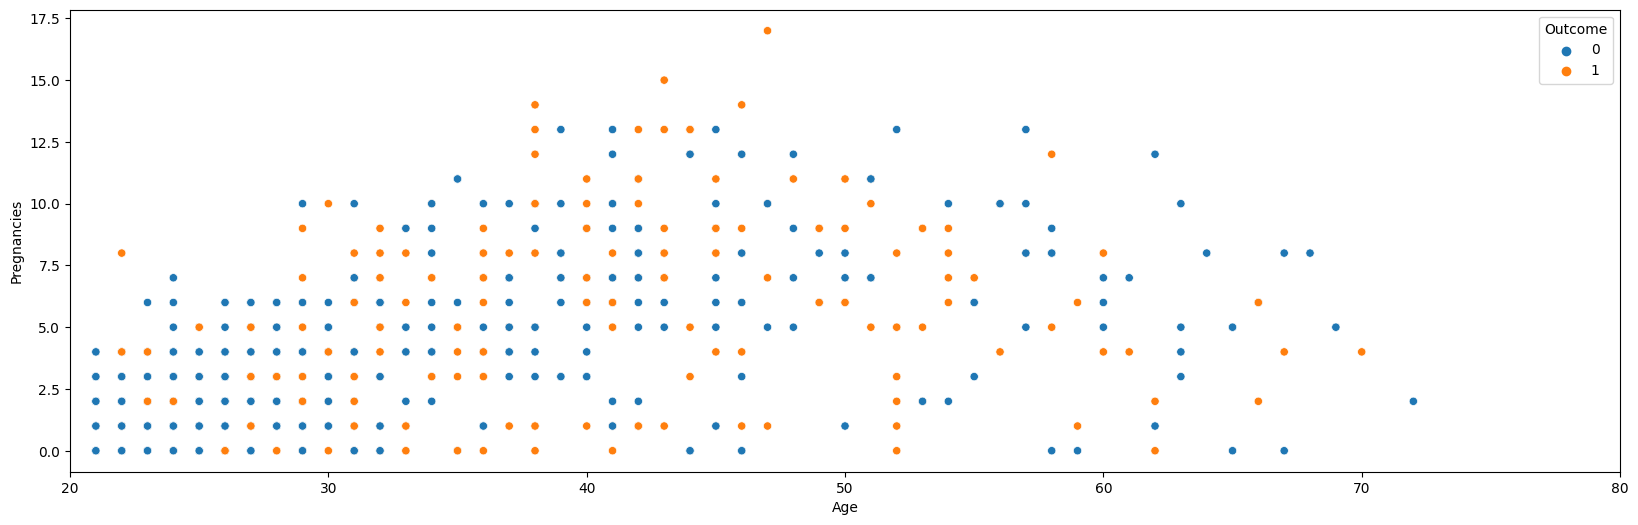

In [53]:
# draw a scatterplot between Pregnancies and Age
sns.scatterplot(data=df, y='Pregnancies', x='Age', hue='Outcome')
plt.xlim(20,80)

<Axes: xlabel='Insulin', ylabel='SkinThickness'>

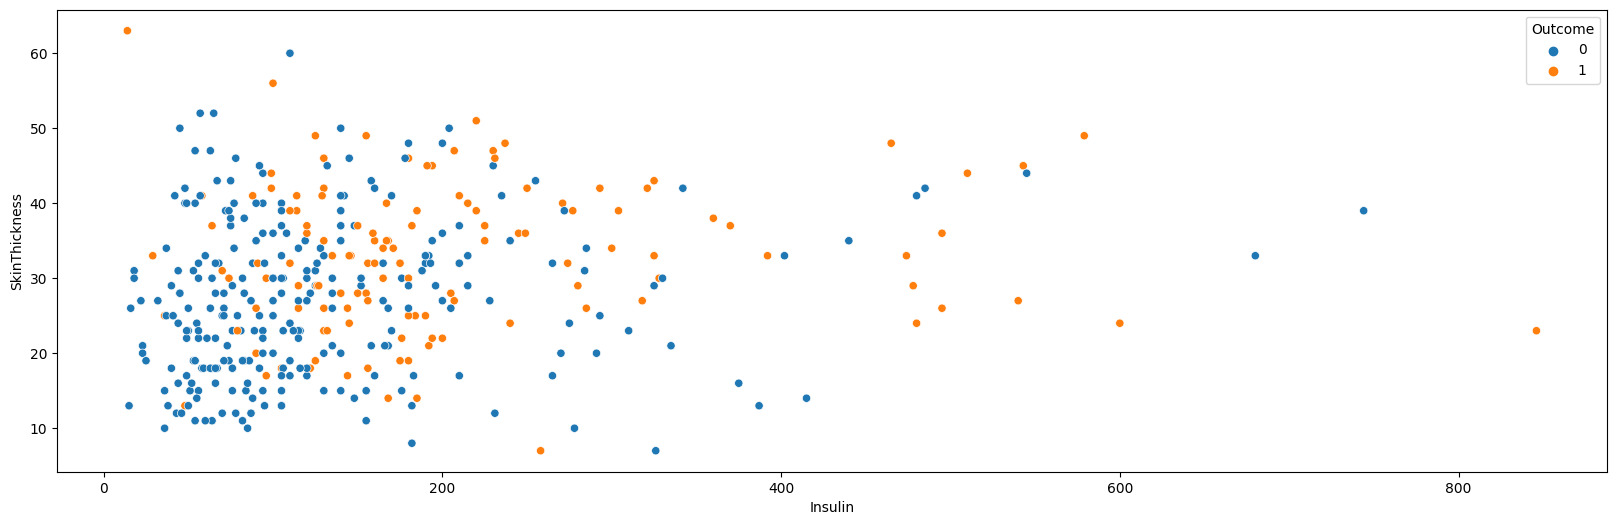

In [59]:
sns.scatterplot(data=df, x='Insulin', y='SkinThickness', hue='Outcome')

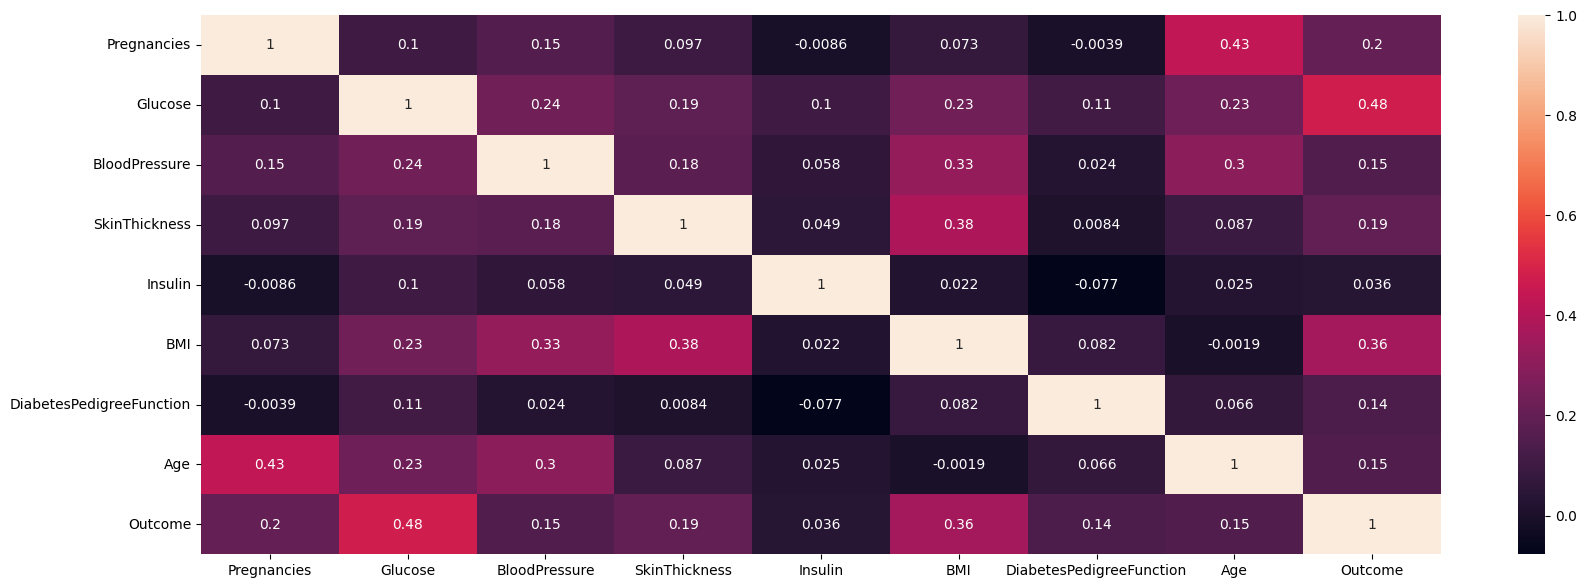

In [72]:
# draw a 2-D correlation heatmap
fig, ax = plt.subplots(figsize=(20, 7))
dataplot = sns.heatmap(df.corr(), annot=True, ax=ax)
plt.show()

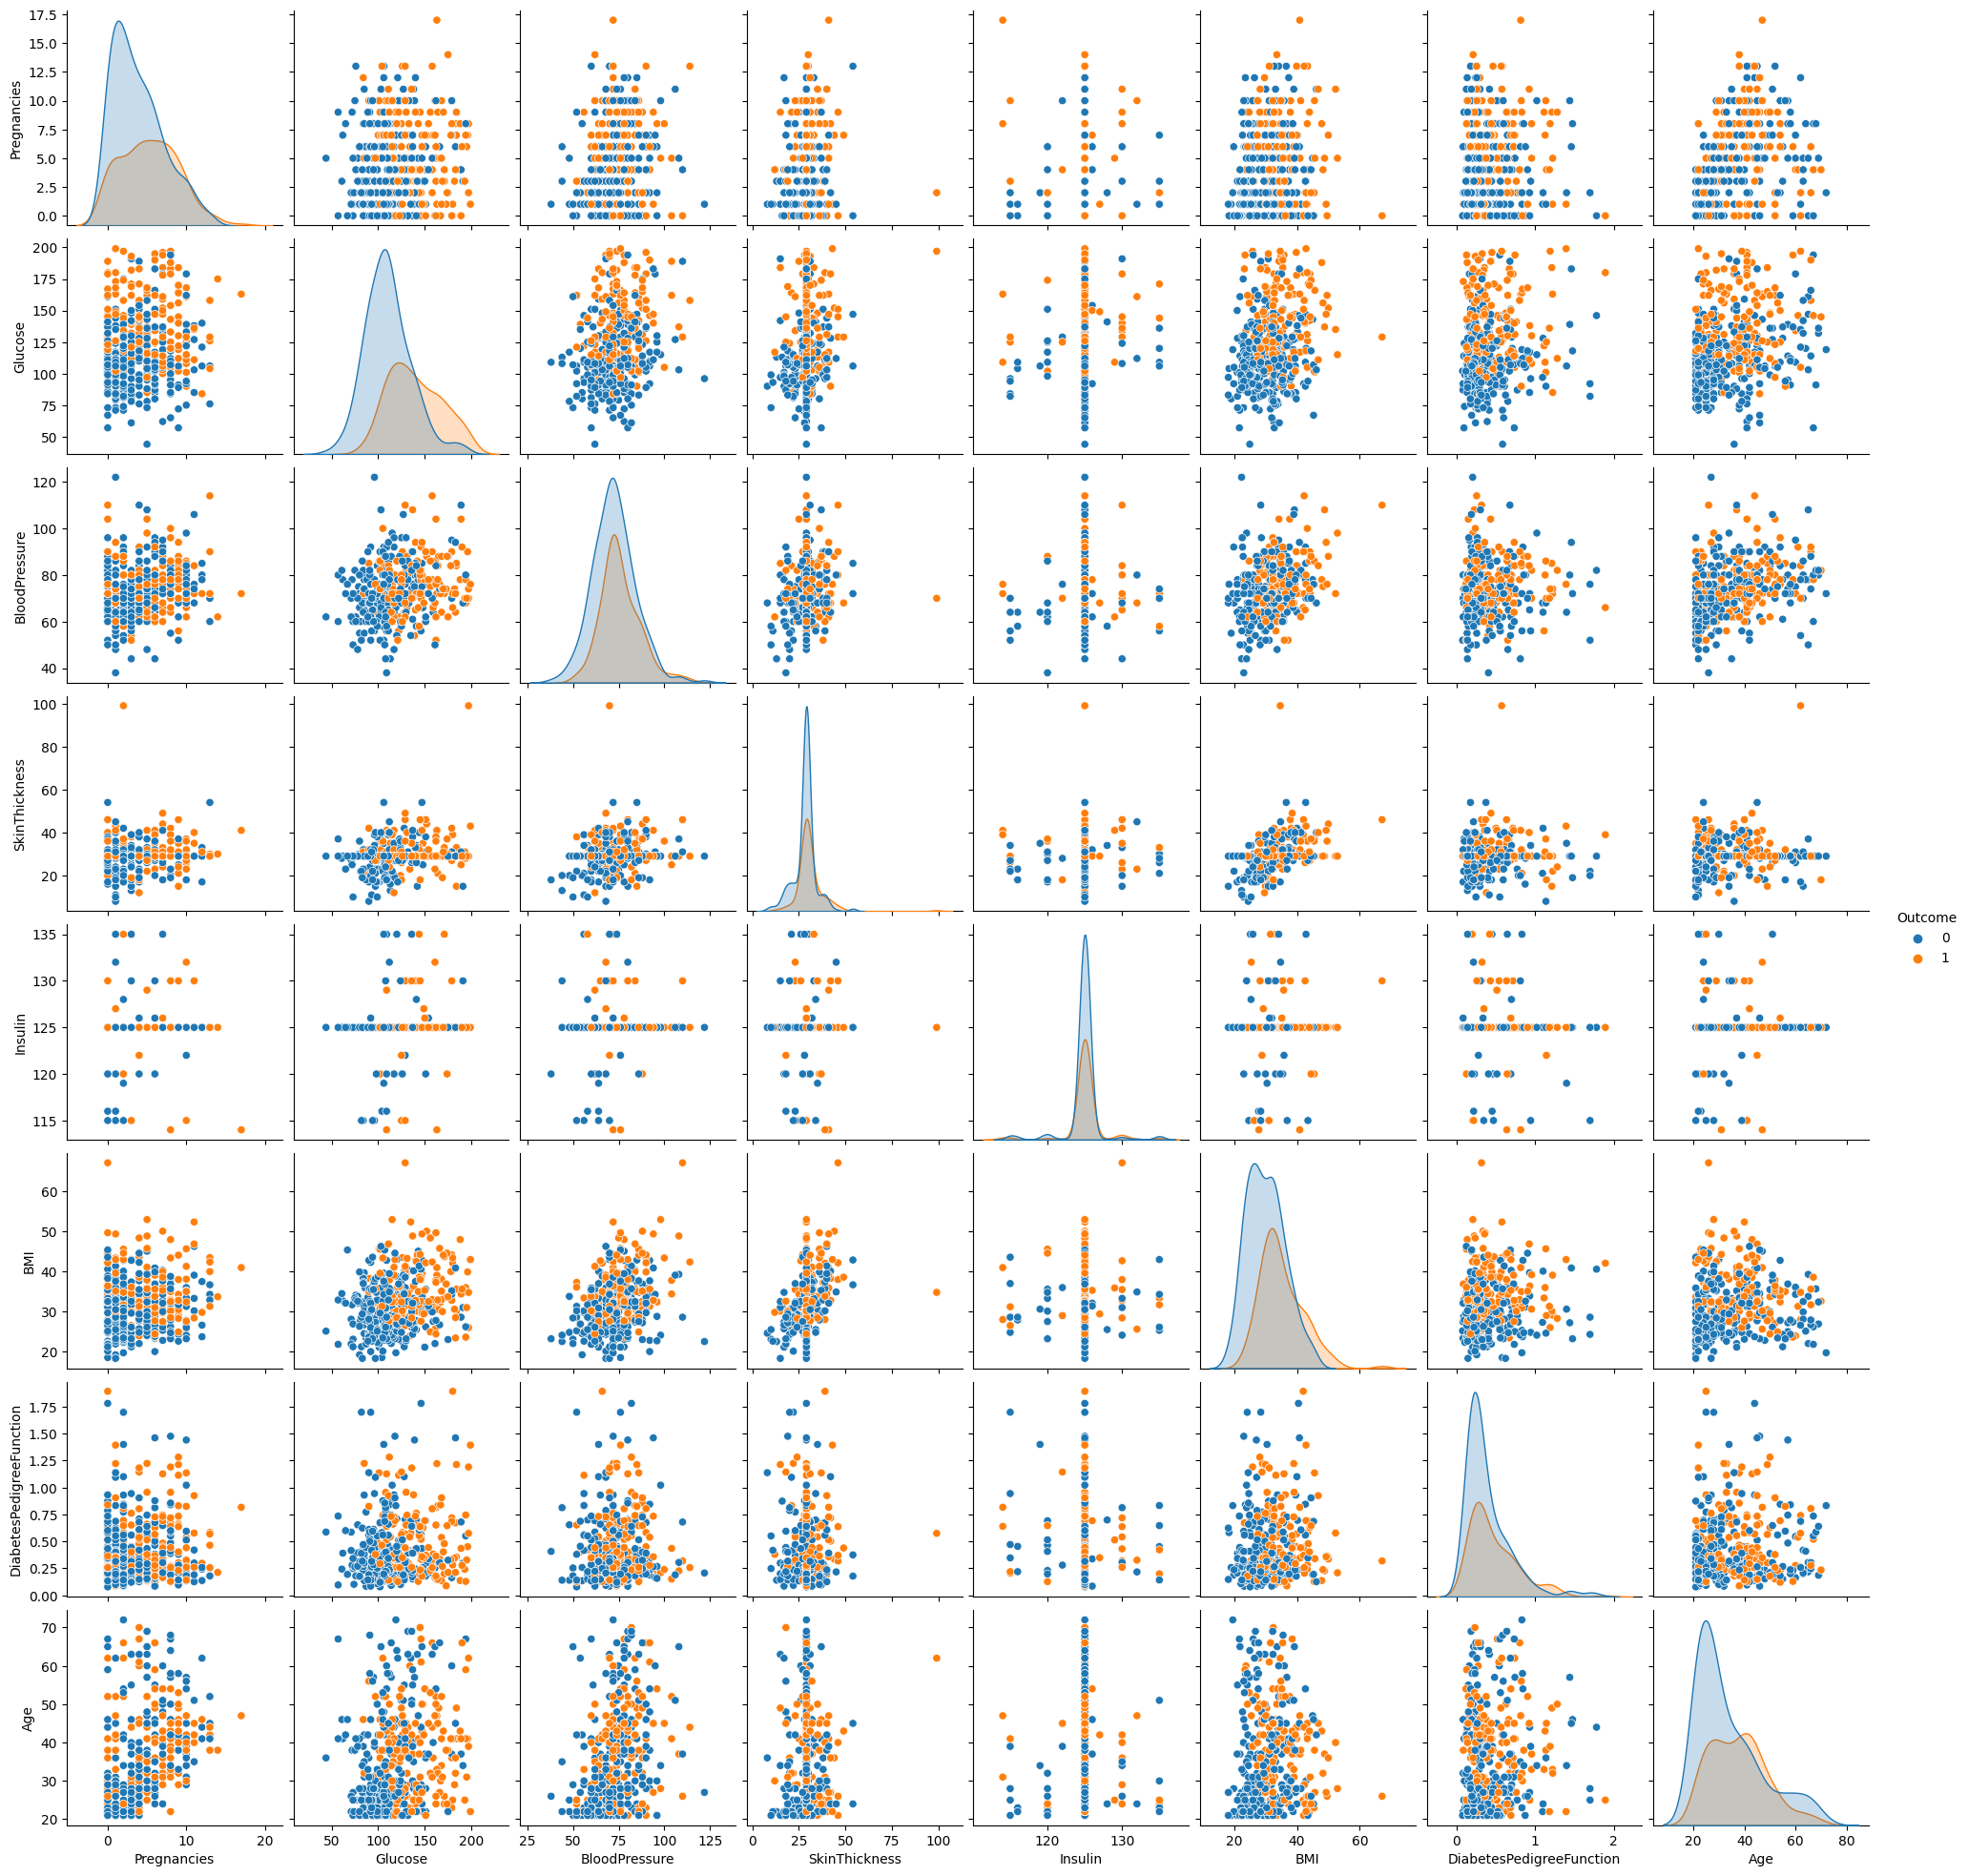

In [71]:
# Create a pairplot
sns.pairplot(df, hue="Outcome")
plt.show()

In [31]:
# statistical summary of numerical features
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Statistical part of this dataset shows that

Pregnancies: The average number of pregnancies is around 3.84 with a standard deviation of 3.37. The maximum number of pregnancies recorded is 17.\
Glucose: The average glucose level is 120.89 with a standard deviation of 31.97. The minimum value is 0 which is not medically possible and it shows a missing or incorrect data.\
BloodPressure: The average blood pressure is around 69.10 with a standard deviation of 19.36. Similar to glucose, a blood pressure of 0 is not possible and indicates missing or incorrect data.\
SkinThickness: The average skin thickness is around 20.54 with a standard deviation of 15.95. There are also records with skin thickness of 0, which indicates missing or incorrect data.\
Insulin: The average insulin level is around 79.80 with a standard deviation of 115.24. Records with insulin level of 0 also indicate missing or incorrect data.\
BMI: The average BMI is around 31.99 with a standard deviation of 7.88. A BMI of 0 is not possible and indicates missing or incorrect data.\
DiabetesPedigreeFunction: The average value is around 0.47 with a standard deviation of 0.33.\
Age: The average age is around 33.24 with a standard deviation of 11.76.\
Outcome: About 34.9% of the patients in the dataset have diabetes.

It is seen that the minimum values of some variables in the data set are 0. For example, a glucose or insulin value of 0 is a situation that cannot actually happen. Probably the NAN values are replaced with 0. It is a good start for us to detect these values.

In [32]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Text(0.5, 1.0, 'Missing values')

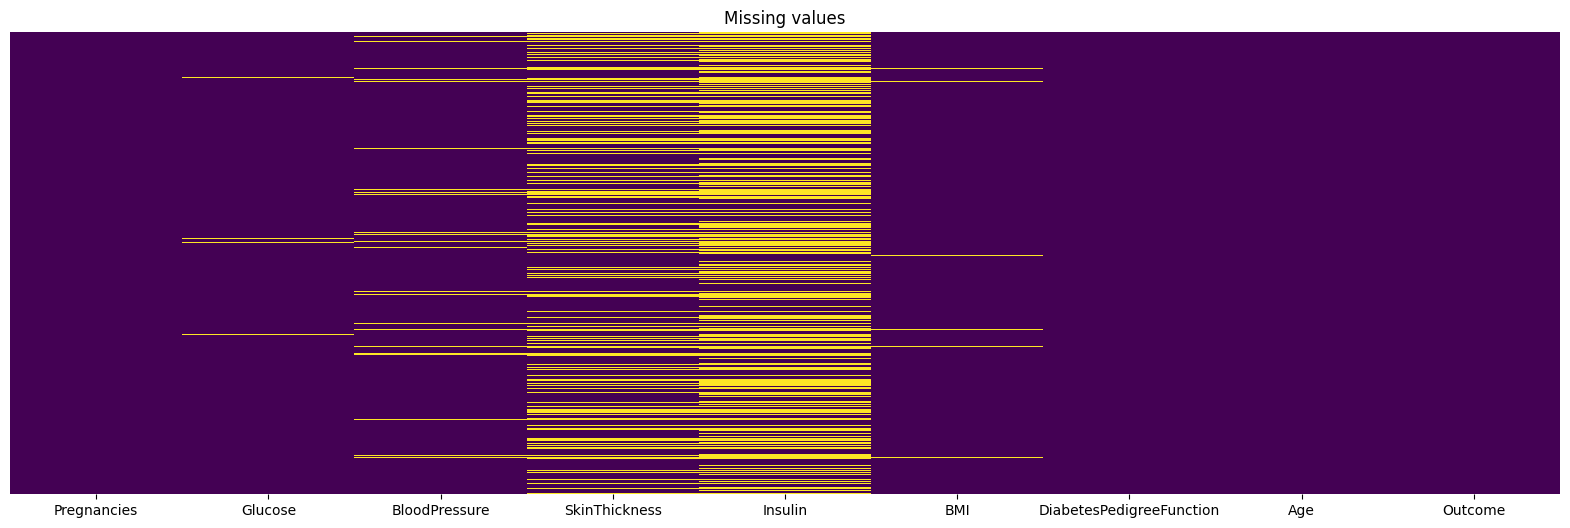

In [36]:
# Let's plot the missing/null values in the dataset
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,6)
sns.heatmap(df.isnull(),yticklabels = False, cbar = False , cmap = 'viridis')
plt.title("Missing values")

c. Clean the dataset, remove the missing values as mentioned in the Lectures 15\
&emsp;&emsp;i. Explain your approach in the Collab notebook text cell

In [60]:
# finding the null values in the dataset
(df.isnull().sum()*100/len(df)).sort_values(ascending=False)

Insulin                     48.697917
SkinThickness               29.557292
BloodPressure                4.557292
BMI                          1.432292
Glucose                      0.651042
Pregnancies                  0.000000
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [61]:
len(df)

768

**Missing values:**
- Insulin = 48.7% - 374
- SkinThickness = 29.56% - 227
- BloodPressure = 4.56% - 35
- BMI = 1.43% - 11
- Glucose = 0.65% - 5

In [62]:
# replace the missing values in Insulin, SkinThickness, BloodPressure, BMI and Glucose with median
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].median())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].median())

df.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [63]:
# find the duplicate rows in the dataset
df.duplicated().sum()

0

In [64]:
df.nunique()

Pregnancies                  17
Glucose                     135
BloodPressure                46
SkinThickness                50
Insulin                     185
BMI                         247
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

<Axes: >

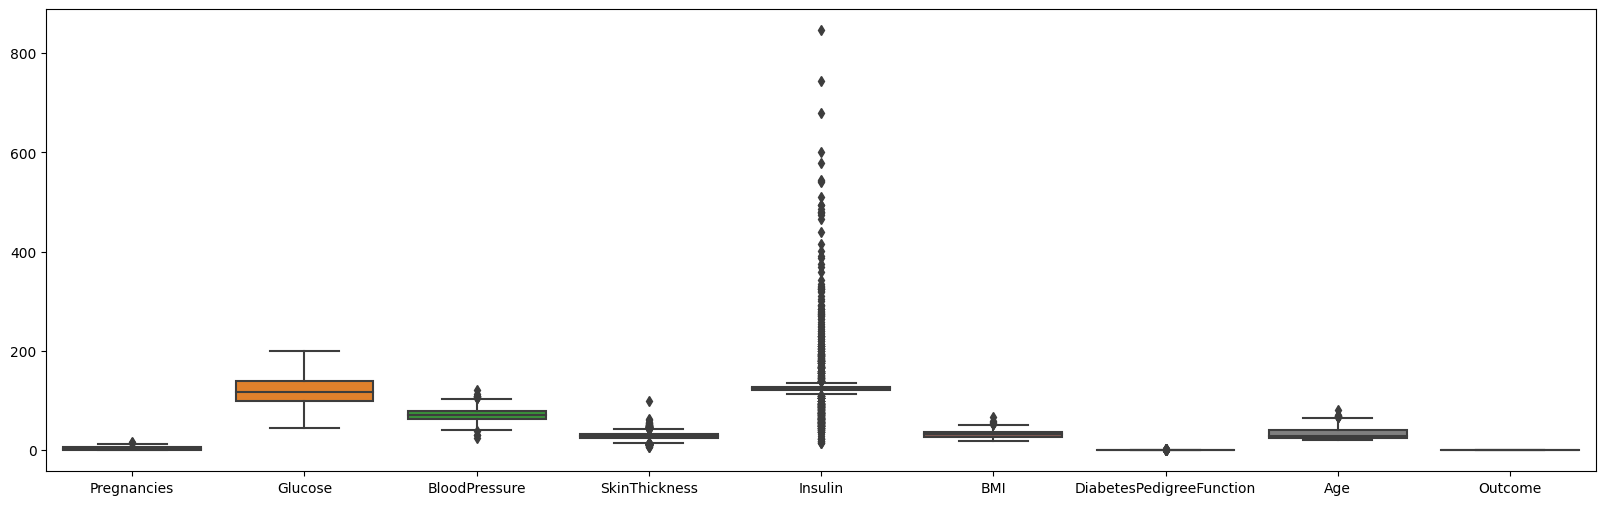

In [65]:
# find the outliers in the dataset
sns.boxplot(data=df)

Insulin column consists of outliers, lets deal with these outliers with IQR method

In [66]:
# remove the outliers in Insulin using IQR method
Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Insulin'] < (Q1 - 1.5 * IQR)) | (df['Insulin'] > (Q3 + 1.5 * IQR)))]

<Axes: >

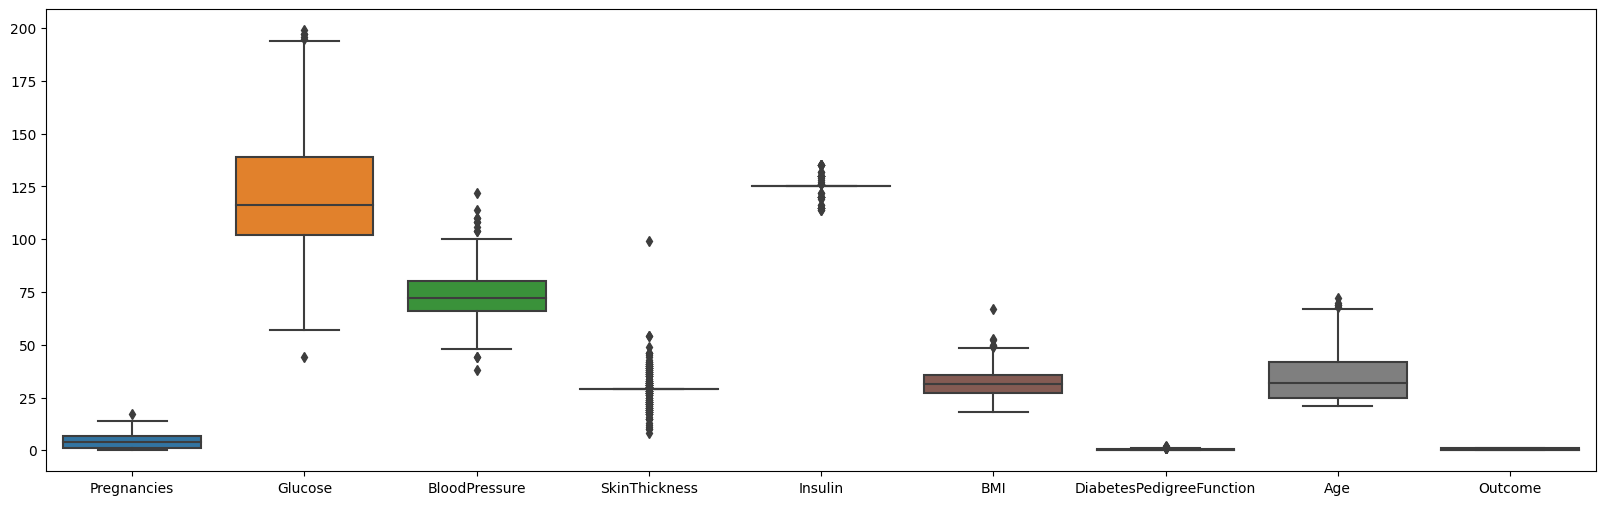

In [67]:
# again draw boxplot correcting outliers in Insulin
sns.boxplot(data=df)

d. **Select the target variable** and clearly mention the reason for selecting it.

we select the target variable as 'Outcome', since we are interested to findout what attributes contribute to make a person healthy or unhealthy.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               422 non-null    int64  
 1   Glucose                   422 non-null    float64
 2   BloodPressure             422 non-null    float64
 3   SkinThickness             422 non-null    float64
 4   Insulin                   422 non-null    float64
 5   BMI                       422 non-null    float64
 6   DiabetesPedigreeFunction  422 non-null    float64
 7   Age                       422 non-null    int64  
 8   Outcome                   422 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 33.0 KB


e. **Transform the Dataset**\
&emsp;&emsp;i. Transform the whole dataset (Features , Target Variable)

In [69]:
# selecting the features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

f. **Split the Dataset** into train and test set

In [70]:
# split the data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. **Use the Scikit Learn Library to Make the Classification Models**\
&emsp;&emsp;a. Use the different regression models\
&emsp;&emsp;&emsp;&emsp;i. Logistic regression regression\
&emsp;&emsp;&emsp;&emsp;ii. Decision tree Classifier\
&emsp;&emsp;&emsp;&emsp;iii. Random forest Classifier\
&emsp;&emsp;&emsp;&emsp;iv. Gradient boosting Classifier

## **Logistic Regression**

Accuracy Score:  0.75
Precision Score:  0.73
Recall Score:  0.52
F1 Score:  0.60
Confusion Matrix:  [[48  6]
 [15 16]]


<Axes: >

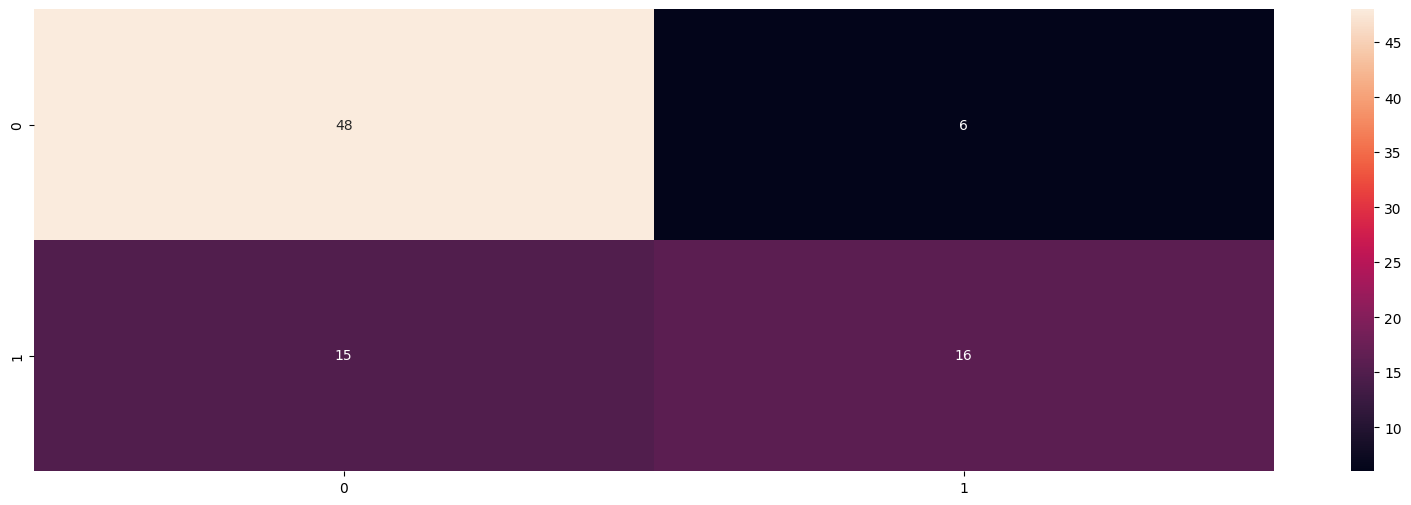

In [73]:
# create a logistic regression model
model = LogisticRegression()

# fit the model
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1score=f1_score(y_test, y_pred)
confusionMatrix=confusion_matrix(y_test, y_pred)

# print the accuracy score, precision score, recall score and f1 score
print('Accuracy Score: ',(f'{accuracy:.2f}'))
print('Precision Score: ',(f'{precision:.2f}'))
print('Recall Score: ',(f'{recall:.2f}'))
print('F1 Score: ',(f'{f1score:.2f}'))
print('Confusion Matrix: ',(confusionMatrix))

# Draw a confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

## **Decision-Tree Classifier**

Accuracy Score:  0.66
Precision Score:  0.53
Recall Score:  0.58
F1 Score:  0.60
Confusion Matrix:  [[38 16]
 [13 18]]


<Axes: >

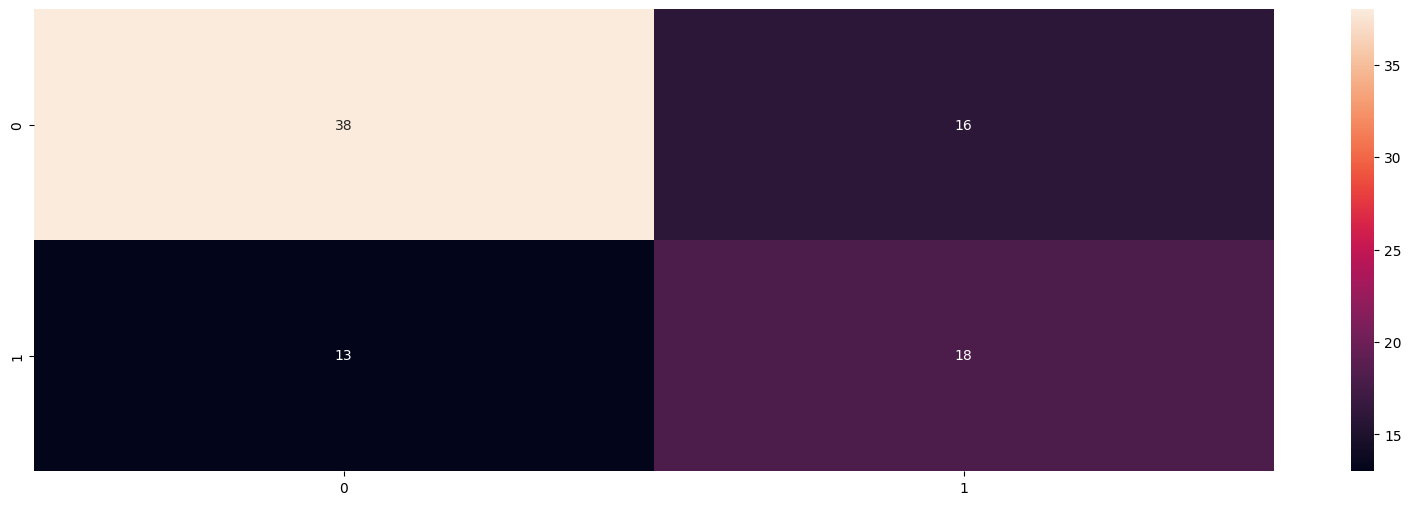

In [74]:
# create a Decision-Tree model
model = DecisionTreeClassifier()

# fit the model
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
confusionMatrix=confusion_matrix(y_test, y_pred)

# print the accuracy score, precision score, recall score and f1 score
# print the accuracy score, precision score, recall score and f1 score
print('Accuracy Score: ',(f'{accuracy:.2f}'))
print('Precision Score: ',(f'{precision:.2f}'))
print('Recall Score: ',(f'{recall:.2f}'))
print('F1 Score: ',(f'{f1score:.2f}'))
print('Confusion Matrix: ',(confusionMatrix))

# Draw a confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

## **Random Forest Classifier**

Accuracy Score:  0.71
Precision Score:  0.61
Recall Score:  0.55
F1 Score:  0.60
Confusion Matrix:  [[43 11]
 [14 17]]


<Axes: >

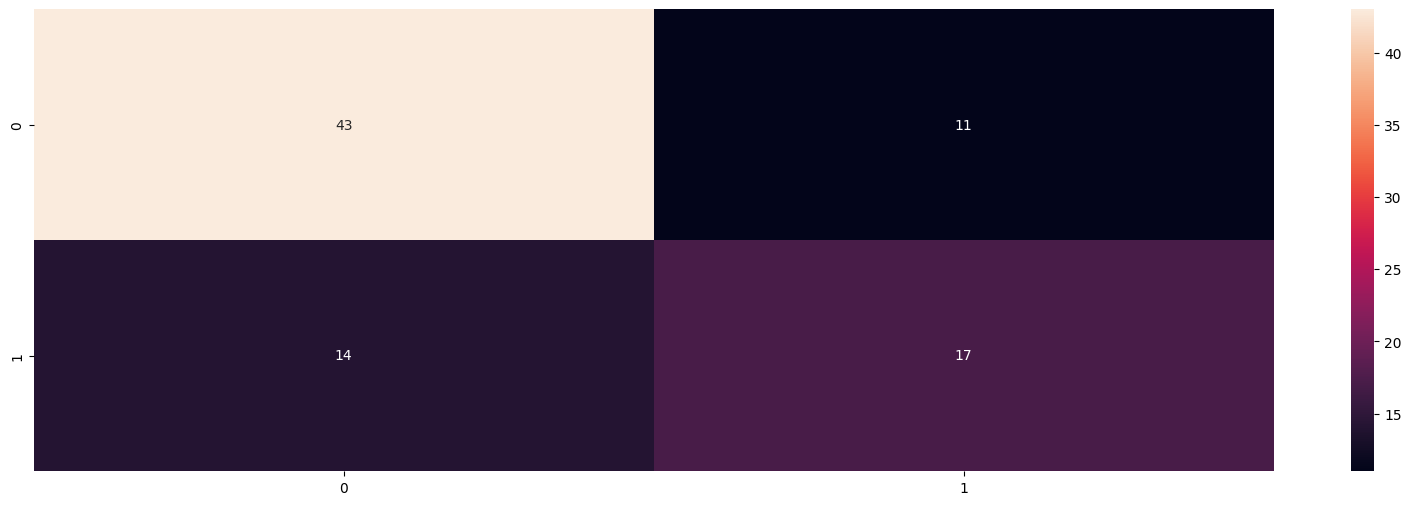

In [75]:
# create a RandomForest Classifier model
model = RandomForestClassifier()

# fit the model
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
confusionMatrix=confusion_matrix(y_test, y_pred)

# print the accuracy score, precision score, recall score and f1 score
# print the accuracy score, precision score, recall score and f1 score
print('Accuracy Score: ',(f'{accuracy:.2f}'))
print('Precision Score: ',(f'{precision:.2f}'))
print('Recall Score: ',(f'{recall:.2f}'))
print('F1 Score: ',(f'{f1score:.2f}'))
print('Confusion Matrix: ',(confusionMatrix))

# Draw a confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

## **Gradient Boosting Classifier**

Accuracy Score:  0.72
Precision Score:  0.61
Recall Score:  0.61
F1 Score:  0.60
Confusion Matrix:  [[42 12]
 [12 19]]


<Axes: >

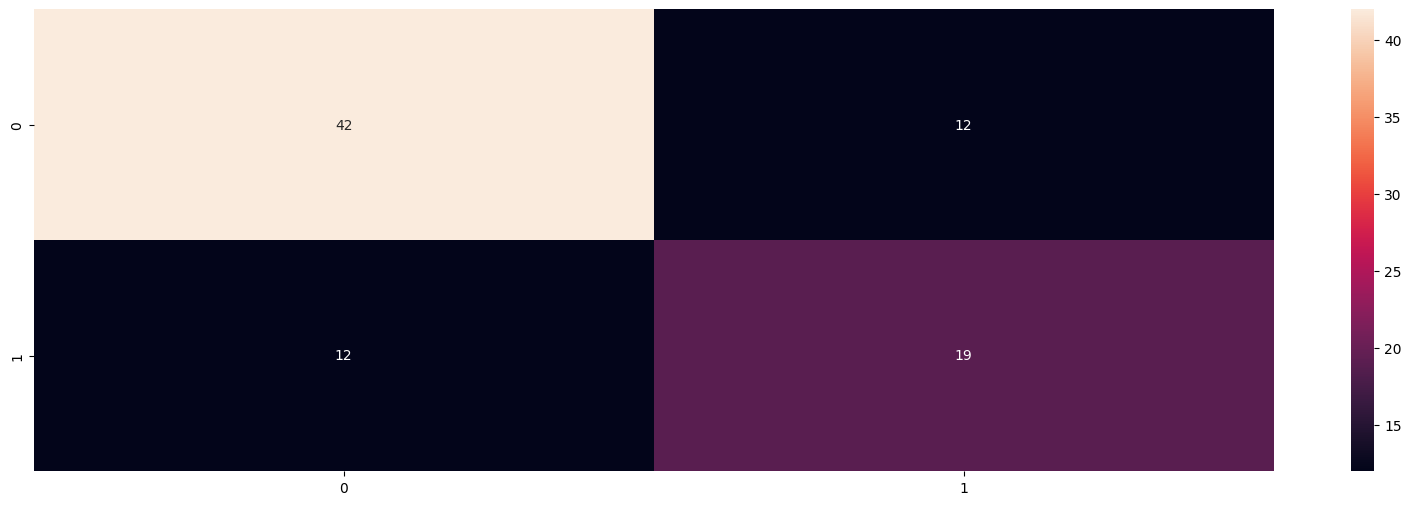

In [76]:
# create a GradientBoosting Classifier model
model = GradientBoostingClassifier()

# fit the model
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
# evaluate the model
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
confusionMatrix=confusion_matrix(y_test, y_pred)

# print the accuracy score, precision score, recall score and f1 score
# print the accuracy score, precision score, recall score and f1 score
print('Accuracy Score: ',(f'{accuracy:.2f}'))
print('Precision Score: ',(f'{precision:.2f}'))
print('Recall Score: ',(f'{recall:.2f}'))
print('F1 Score: ',(f'{f1score:.2f}'))
print('Confusion Matrix: ',(confusionMatrix))

# Draw a confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [77]:
# model scores
model_scores = {
    "Logistic Regression": 0.75,
    "Decision Tree Classifier": 0.66,
    "Random Forest Classifier": 0.71,
    "Gradient Boosting Classifier": 0.72
}

# Sort the model scores in descending order based on their values (higher values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Display the ranking of the models
print("Model Rankings (Greater Values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")

Model Rankings (Greater Values are better):
1. Logistic Regression: 0.75
2. Gradient Boosting Classifier: 0.72
3. Random Forest Classifier: 0.71
4. Decision Tree Classifier: 0.66


# **Scale the Features**

In [78]:
# Apply the standard scaler on features (X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split data into training and test sets, 80% of the entire dataset for
# training and the remaining 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## **Logistic Regression**

Accuracy Score:  0.74
Precision Score:  0.70
Recall Score:  0.52
F1 Score:  0.60
Confusion Matrix:  [[47  7]
 [15 16]]


<Axes: >

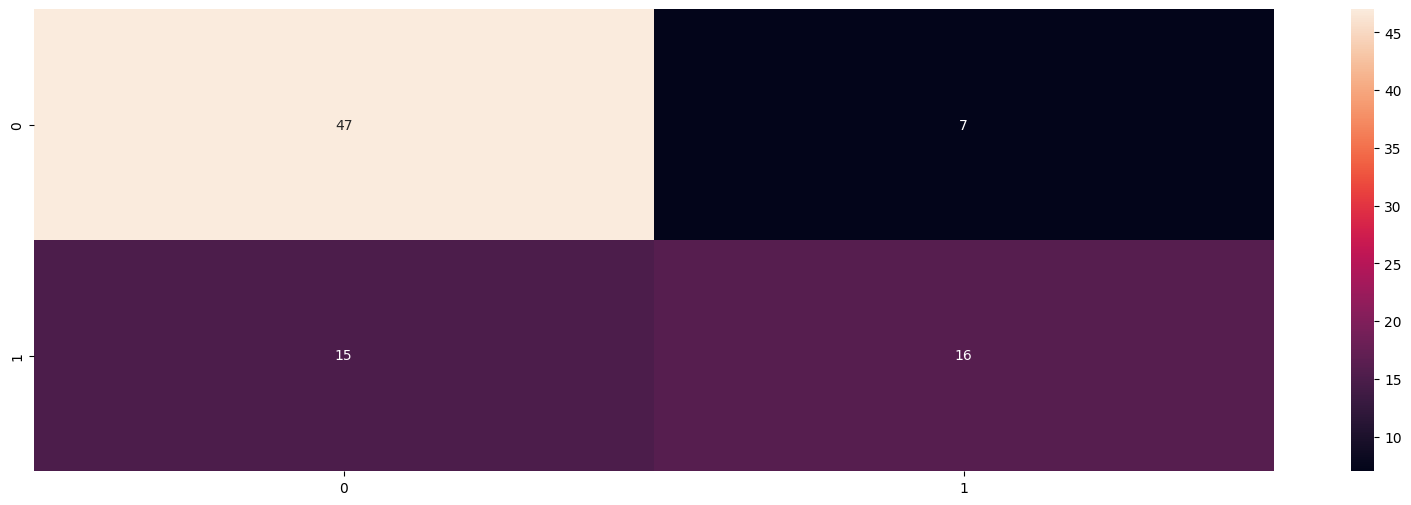

In [79]:
# create a model
model = LogisticRegression()

# fit the model with data and target variable
model.fit(X_train, y_train)

# predict the model
y_pred = model.predict(X_test)

# evaluate the model
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
confusionMatrix=confusion_matrix(y_test, y_pred)

# print the accuracy score, precision score, recall score and f1 score
# print the accuracy score, precision score, recall score and f1 score
print('Accuracy Score: ',(f'{accuracy:.2f}'))
print('Precision Score: ',(f'{precision:.2f}'))
print('Recall Score: ',(f'{recall:.2f}'))
print('F1 Score: ',(f'{f1score:.2f}'))
print('Confusion Matrix: ',(confusionMatrix))

# Draw a confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

## **Decision-Tree Classifier**

Accuracy Score:  0.65
Precision Score:  0.52
Recall Score:  0.55
F1 Score:  0.60
Confusion Matrix:  [[38 16]
 [14 17]]


<Axes: >

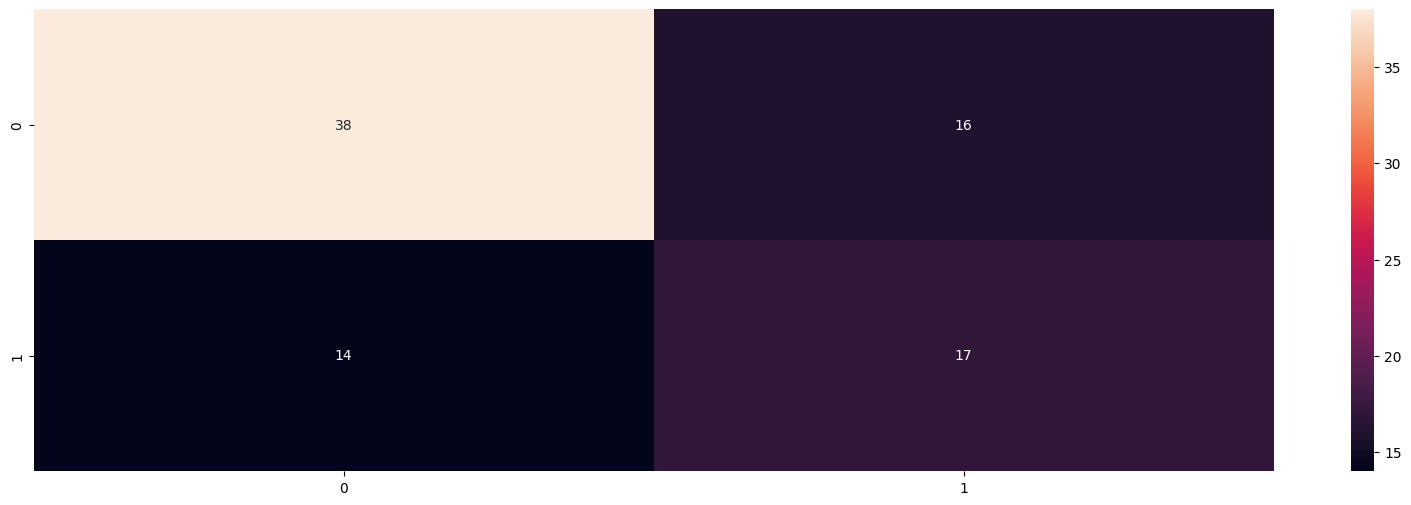

In [80]:
# create a Decision-Tree model
model = DecisionTreeClassifier()

# fit the model
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
confusionMatrix=confusion_matrix(y_test, y_pred)

# print the accuracy score, precision score, recall score and f1 score
# print the accuracy score, precision score, recall score and f1 score
print('Accuracy Score: ',(f'{accuracy:.2f}'))
print('Precision Score: ',(f'{precision:.2f}'))
print('Recall Score: ',(f'{recall:.2f}'))
print('F1 Score: ',(f'{f1score:.2f}'))
print('Confusion Matrix: ',(confusionMatrix))

# Draw a confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

## **Random Forest Classifier**

Accuracy Score:  0.71
Precision Score:  0.62
Recall Score:  0.52
F1 Score:  0.60
Confusion Matrix:  [[44 10]
 [15 16]]


<Axes: >

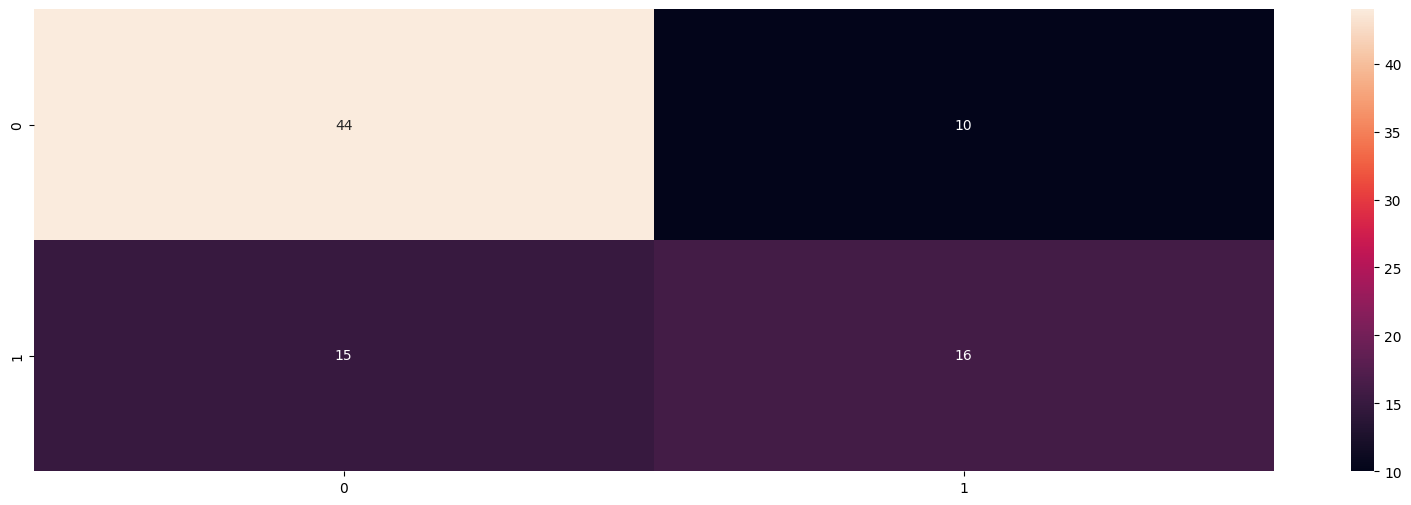

In [81]:
# create a RandomForest Classifier model
model = RandomForestClassifier()

# fit the model
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
confusionMatrix=confusion_matrix(y_test, y_pred)

# print the accuracy score, precision score, recall score and f1 score
# print the accuracy score, precision score, recall score and f1 score
print('Accuracy Score: ',(f'{accuracy:.2f}'))
print('Precision Score: ',(f'{precision:.2f}'))
print('Recall Score: ',(f'{recall:.2f}'))
print('F1 Score: ',(f'{f1score:.2f}'))
print('Confusion Matrix: ',(confusionMatrix))

# Draw a confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

## **Gradient Boosting Classifier**

Accuracy Score:  0.72
Precision Score:  0.61
Recall Score:  0.61
F1 Score:  0.60
Confusion Matrix:  [[42 12]
 [12 19]]


<Axes: >

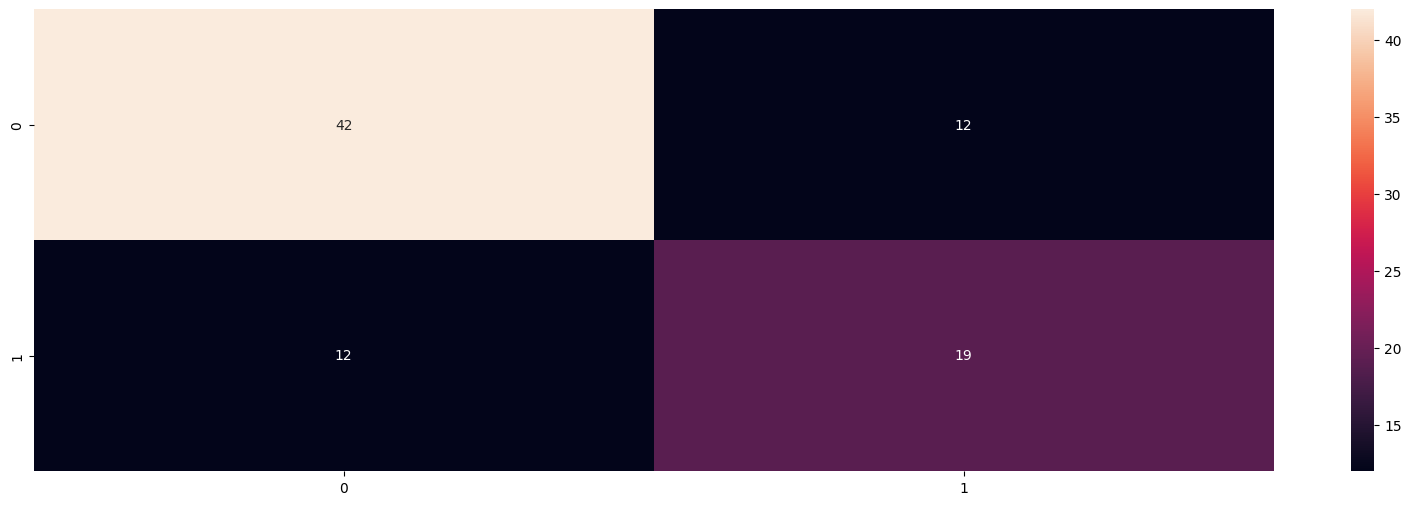

In [82]:
# create a GradientBoosting Classifier model
model = GradientBoostingClassifier()

# fit the model
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
# evaluate the model
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
confusionMatrix=confusion_matrix(y_test, y_pred)

# print the accuracy score, precision score, recall score and f1 score
# print the accuracy score, precision score, recall score and f1 score
print('Accuracy Score: ',(f'{accuracy:.2f}'))
print('Precision Score: ',(f'{precision:.2f}'))
print('Recall Score: ',(f'{recall:.2f}'))
print('F1 Score: ',(f'{f1score:.2f}'))
print('Confusion Matrix: ',(confusionMatrix))

# Draw a confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [84]:
# model scores
model_scores = {
    "Logistic Regression": 0.74,
    "Decision Tree Classifier": 0.65,
    "Random Forest Classifier": 0.71,
    "Gradient Boosting Classifier": 0.72
}

# Sort the model scores in descending order based on their values (higher values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Display the ranking of the models
print("Model Rankings (Greater Values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")


Model Rankings (Greater Values are better):
1. Logistic Regression: 0.74
2. Gradient Boosting Classifier: 0.72
3. Random Forest Classifier: 0.71
4. Decision Tree Classifier: 0.65


Remarks: Scaling the features didn't bring an impact on the Accuracy of different models. Scaling target variable 'Outcome' wouldn't bring anychange as it is already in 0 & 1.

**b. What evaluation metric should we use and why provide the reason for that.**

Precision, recall, accuracy score, and confusion matrix are common evaluation metrics used to assess the performance of classification models. Each metric provides different insights into the model's performance and helps you understand how well the model is classifying different classes. Let's discuss each metric and its purpose:

1. **Precision**:
Precision is the ratio of true positive (TP) predictions to the total number of positive predictions made by the model. It measures the model's ability to correctly identify positive instances out of all instances it predicted as positive. Precision is calculated using the formula:

   Precision = TP / (TP + FP)

   where TP is the number of true positives (correctly predicted positive instances), and FP is the number of false positives (negative instances predicted as positive).

   High precision indicates that when the model predicts a positive class, it is likely to be correct. Precision is particularly important when the cost of false positives is high, as in cases where false positives could lead to significant consequences.

2. **Recall**:
Recall, also known as sensitivity or true positive rate, is the ratio of true positive predictions to the total number of actual positive instances. It measures the model's ability to correctly identify all positive instances. Recall is calculated using the formula:

   Recall = TP / (TP + FN)

   where TP is the number of true positives (correctly predicted positive instances), and FN is the number of false negatives (positive instances predicted as negative).

   High recall indicates that the model is effectively capturing a majority of positive instances, minimizing the number of instances that go undetected.

3. **Accuracy Score**:
Accuracy is the ratio of correct predictions (both true positives and true negatives) to the total number of instances in the dataset. It measures the overall correctness of the model's predictions. Accuracy is calculated using the formula:

   Accuracy = (TP + TN) / (TP + TN + FP + FN)

   where TP is the number of true positives, TN is the number of true negatives, FP is the number of false positives, and FN is the number of false negatives.

   While accuracy is a common metric, it might not be suitable for imbalanced datasets where one class dominates. A high accuracy score can be misleading if the model is biased towards the majority class, especially when the minority class is of interest.

4. **Confusion Matrix**:
A confusion matrix is a table that summarizes the performance of a classification algorithm. It shows the number of true positives, true negatives, false positives, and false negatives. It helps you understand the distribution of predicted classes compared to actual classes.

   The confusion matrix is the foundation for calculating precision, recall, and other metrics. It provides a clear picture of how the model is performing on different classes.

In summary, each of these metrics provides a different perspective on the performance of a classification model. Depending on the specific problem and the associated costs of different types of errors, you can choose the appropriate metric(s) to evaluate your model and make informed decisions about its deployment or further improvements.